# CSIC5011 - HW3

----

## NGUYEN, Huu Canh
## 20818623

## Q1
----

In [1]:
import pandas as pd
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

In [2]:
# Extract label info
label_data = pd.read_csv('ceph_hgdp_minor_code_XNA.sampleInformation.csv')
regions = label_data['region'].unique()
idx = []
for region in regions:
    region_idx = label_data[label_data['region']==region].index
    idx.append(region_idx)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

In [3]:
# Load features
data = pd.read_csv('ceph_hgdp_minor_code_XNA.betterAnnotated.csv')
data.head()

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1


In [4]:
# to_numpy
X = data.drop(columns=['snp', 'chr', 'pos']).to_numpy()
p, n = X.shape

In [5]:
# Random projection
projector = GaussianRandomProjection(n_components=5000,eps=0.05)
X_new = projector.fit_transform(X.transpose()).transpose()

In [6]:
# Compute the sample mean
mu = np.mean(X_new, axis=1)
X_tidle = X_new - mu[:,None]

In [7]:
# Compute top k SVD
u, s, vh = np.linalg.svd(X_tidle)

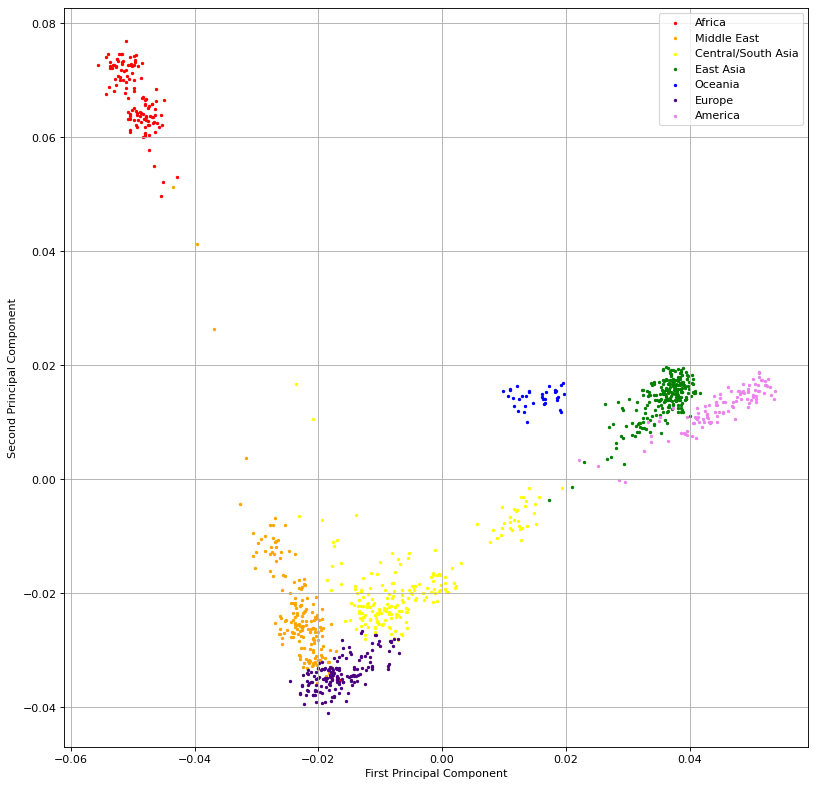

In [8]:
# Plot clusters
fig = plt.figure(figsize=(12, 12), dpi=80)
for i, region in enumerate(regions):
    plt.scatter(vh[0][idx[i]], vh[1][idx[i]], color=colors[i], label=region, s=4)

plt.legend()
plt.grid(True)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## Q2
----

In [12]:
import cvxpy as cp
d=20
success = np.zeros((d,d))
for n in range(d):
    for k in range(d):
        success_count=0
        for _ in range(50):
            # construct a spare vector
            x0=np.zeros(d)
            idx = np.random.choice(range(d), k+1, replace=False)
            values = np.random.choice([-1,1], k+1)
            x0[idx]=values
            # create a Gaussian random matrix
            A = np.random.normal(0, 1, size=(n+1, d))
            b = A@x0
            # solve the problem
            x = cp.Variable(d)
            constraints = [A@x==b]
            objective = cp.Minimize(cp.sum(cp.abs(x)))
            problem = cp.Problem(objective, constraints)
            problem.solve()
            # Declare success
            if problem.status not in ["infeasible", "unbounded"]:
                if np.linalg.norm(x.value - x0, ord=2) <= 1e-3:
                    success_count+=1

        success[n,k]=success_count/50.


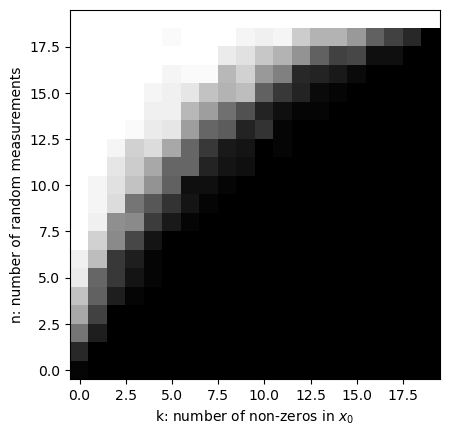

In [13]:
plt.imshow(success, cmap='gray', origin='lower')
plt.xlabel("k: number of non-zeros in $x_0$")
plt.ylabel("n: number of random measurements")
plt.show()


The phase transition phenomenon in compressed sensing. The plot evinces that, for a given sparsity level $k$, the $l_1$ minimization technique almost always succeeds when we have an adequate number $m$ of measurements, while it almost always fails when we have fewer measurements.